# Black friday EDA and feature engineering

## cleaning and preparing the data for model training

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')
df_train.shape

(550068, 12)

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [4]:
# merge both train and test data
df=pd.merge(df_train, df_test, how='outer')
df.shape

(783667, 12)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00000142,F,0-17,10,A,2,0,3,4.0,5.0,13650.0
1,1000001,P00004842,F,0-17,10,A,2,0,3,4.0,12.0,13645.0
2,1000001,P00025442,F,0-17,10,A,2,0,1,2.0,9.0,15416.0
3,1000001,P00051442,F,0-17,10,A,2,0,8,17.0,NaN,9938.0
4,1000001,P00051842,F,0-17,10,A,2,0,4,8.0,NaN,2849.0


In [6]:
df.describe

<bound method NDFrame.describe of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00000142      F   0-17          10             A   
1       1000001  P00004842      F   0-17          10             A   
2       1000001  P00025442      F   0-17          10             A   
3       1000001  P00051442      F   0-17          10             A   
4       1000001  P00051842      F   0-17          10             A   
...         ...        ...    ...    ...         ...           ...   
783662  1006040  P00343042      M  26-35           6             B   
783663  1006040  P00344242      M  26-35           6             B   
783664  1006040  P00346242      M  26-35           6             B   
783665  1006040  P00349442      M  26-35           6             B   
783666  1006040   P0097242      M  26-35           6             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0   

In [7]:
# delete the user_id column since it is not useful for us
df.drop(['User_ID'] ,axis=1, inplace=True)

In [8]:
df.head()
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
# to convert gender(categorical feature) into numberical feature 
#take f as 0 and m as 1
df['Gender']=df['Gender'].map({'F':0, 'M':1})
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00000142,0,0-17,10,A,2,0,3,4.0,5.0,13650.0
1,P00004842,0,0-17,10,A,2,0,3,4.0,12.0,13645.0
2,P00025442,0,0-17,10,A,2,0,1,2.0,9.0,15416.0
3,P00051442,0,0-17,10,A,2,0,8,17.0,NaN,9938.0
4,P00051842,0,0-17,10,A,2,0,4,8.0,NaN,2849.0


In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
# handle categorical feature age
# this is called as target guiding (values that our model is able to understand wrt to other features)
# also called target-guided ordinal encoding
df['Age'] = df['Age'].map({'0-17':1,'18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})


In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00000142,0,1,10,A,2,0,3,4.0,5.0,13650.0
1,P00004842,0,1,10,A,2,0,3,4.0,12.0,13645.0
2,P00025442,0,1,10,A,2,0,1,2.0,9.0,15416.0
3,P00051442,0,1,10,A,2,0,8,17.0,NaN,9938.0
4,P00051842,0,1,10,A,2,0,4,8.0,NaN,2849.0


In [13]:
print(df['City_Category'].unique())
print(df['City_Category'].value_counts())


['A' 'C' 'B']
City_Category
B    329739
C    243684
A    210244
Name: count, dtype: int64


In [14]:
# fixing categorical city_category
df_city=pd.get_dummies(df['City_Category'], drop_first=True).astype(int)

In [15]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [16]:
df=pd.concat([df, df_city],axis=1)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,A,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,A,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,A,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,A,2,0,8,17.0,NaN,9938.0,0,0
4,P00051842,0,1,10,A,2,0,4,8.0,NaN,2849.0,0,0


In [18]:
#drop city category
df=df.drop('City_Category', axis=1)

In [19]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,NaN,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,NaN,2849.0,0,0


In [20]:
#missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [21]:
# focus on replacing missing values
df['Product_Category_2'].unique()

array([ 4.,  2., 17.,  8., nan,  5., 14., 15.,  3.,  6.,  9., 16., 13.,
       11., 18., 12., 10.,  7.])

In [22]:
df['Product_Category_2'].value_counts()


Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [23]:
df['Product_Category_2'].mode()[0]

np.float64(8.0)

In [24]:
#replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [26]:
## product category 3 replace missing values
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,16.0,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,16.0,2849.0,0,0


In [28]:
df.shape

(783667, 12)

In [29]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')

In [31]:
df['Stay_In_Current_City_Years'].unique()


array(['2', '4', '3', '1', '0'], dtype=object)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 71.7+ MB


In [33]:
## convert object type into integer
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 71.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

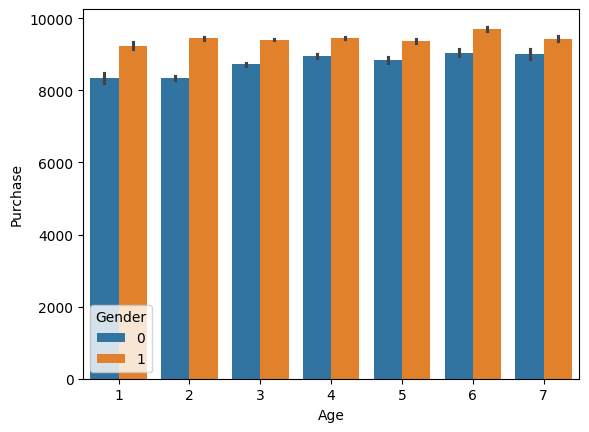

In [37]:
#visualization
# sns.pairplot(df)
sns.barplot(x='Age' , y='Purchase', data=df, hue='Gender')
#female =0 and male =1

In [ ]:
# observation
#purchasing of male over women is high

<Axes: xlabel='Occupation', ylabel='Purchase'>

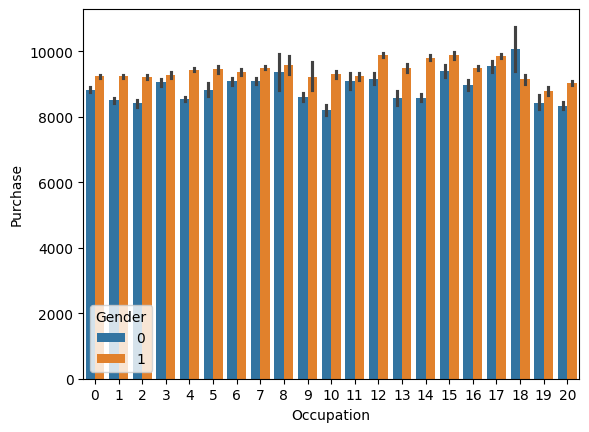

In [38]:
# visualization of purchase with occupation
sns.barplot(x='Occupation', y='Purchase' , data=df, hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

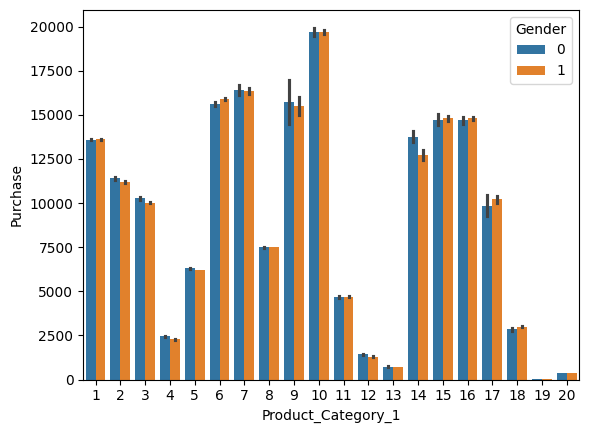

In [40]:
sns.barplot(x='Product_Category_1', y='Purchase' , data=df, hue='Gender')


<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

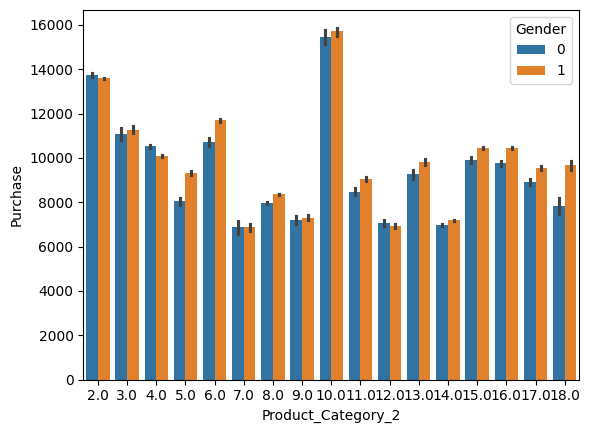

In [41]:
sns.barplot(x='Product_Category_2', y='Purchase' , data=df, hue='Gender')


<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

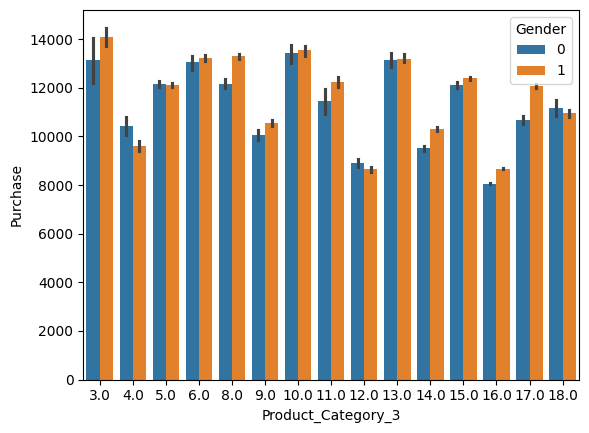

In [42]:
sns.barplot(x='Product_Category_3', y='Purchase' , data=df, hue='Gender')


In [43]:
#observation
#productcatrgory_1 is most purchased among 3
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,13650.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,13645.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,15416.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,16.0,9938.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,16.0,2849.0,0,0


In [44]:
#feature scaling
df_test=df[df['Purchase'].isnull()]

In [45]:
# all values that are not null belong to the train data
df_train=df[~df['Purchase'].isnull()]


In [59]:
x=df_train.drop('Purchase' , axis=1)
x.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00000142,0,1,10,2,0,3,4.0,5.0,0,0
1,P00004842,0,1,10,2,0,3,4.0,12.0,0,0
2,P00025442,0,1,10,2,0,1,2.0,9.0,0,0
3,P00051442,0,1,10,2,0,8,17.0,16.0,0,0
4,P00051842,0,1,10,2,0,4,8.0,16.0,0,0


In [60]:
y=df_train['Purchase']
y.shape

(550068,)

In [61]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(
    x, y , test_size=0.33 , random_state=42
)

In [63]:
x_train.drop('Product_ID', axis=1, inplace =True)
x_test.drop('Product_ID', axis=1, inplace =True)

In [64]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transformnsformansform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# train your model